# Cost Function and Gradient Descent

## Linear Regression

For an input vector $x^T = (X_1 , X_2 , \dots , X_p )$, and a real-valued output y, the linear regression model
has the form:

$$f(X) = \beta_0 + \sum_{j=1}^pX_j\beta_j$$

We consider a set of training data $(x_1 , y_1 ) \dots (x_N , y_N )$ from which to estimate the parameters $\beta$.

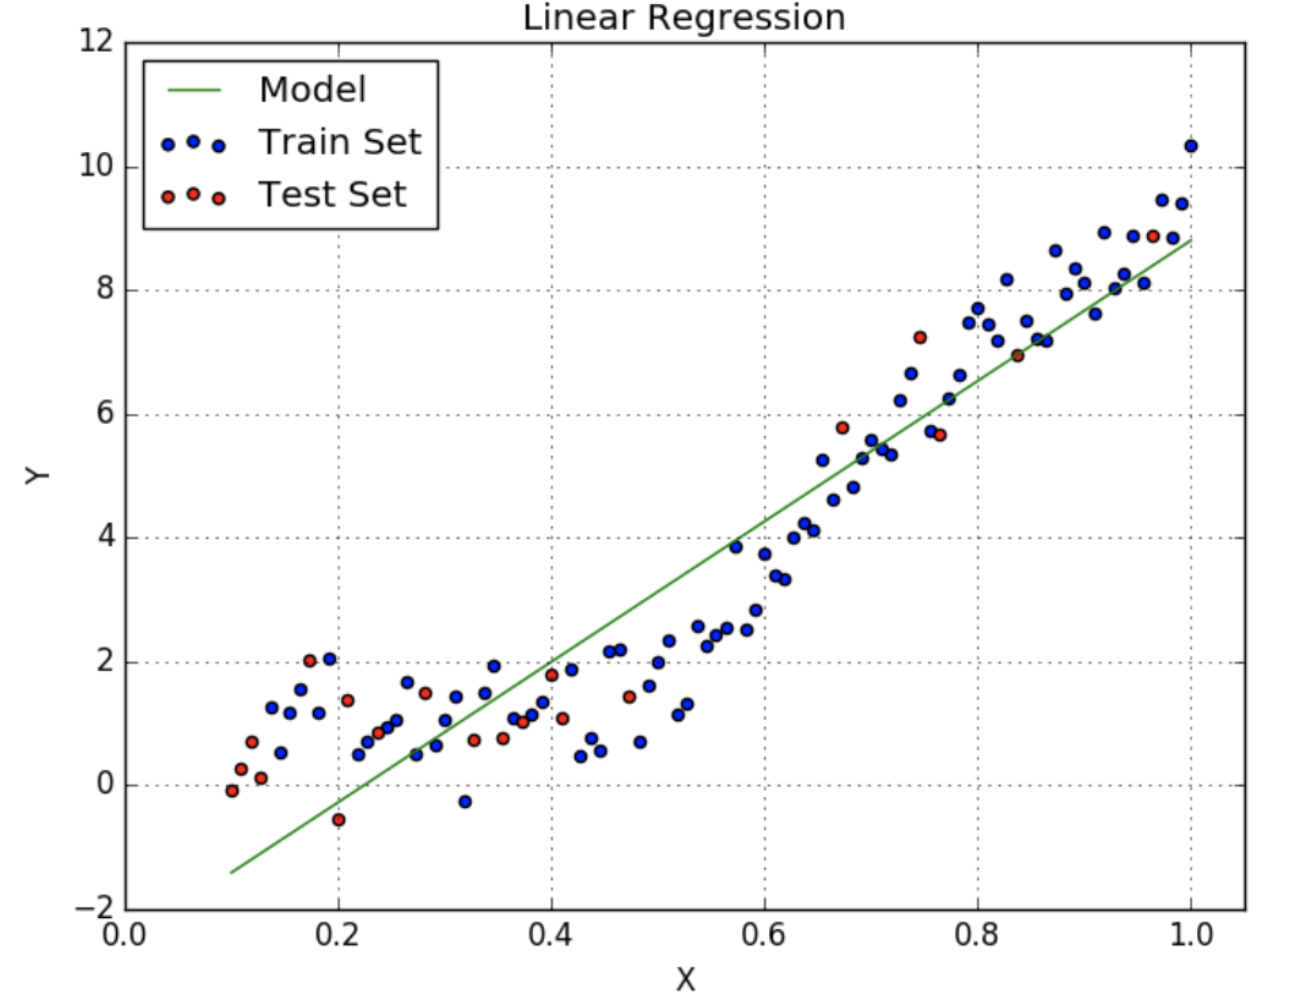

In [12]:
Image(filename='../images/lr.png', width=600)

## Cost function

A cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X (independent variables) and y (dependent variable).

The function that defines the difference between your actual value and the predicted value. 

$$
y_t = y_p + e
$$

In case of Linear regression with:
$$y_p = f(X) = \beta_0 + \beta_1X_1 + \beta_2X_2$$

$$
error = y_t - y_p = y_t - (\beta_0 + \beta_1X_1 + \beta_2X_2)
$$

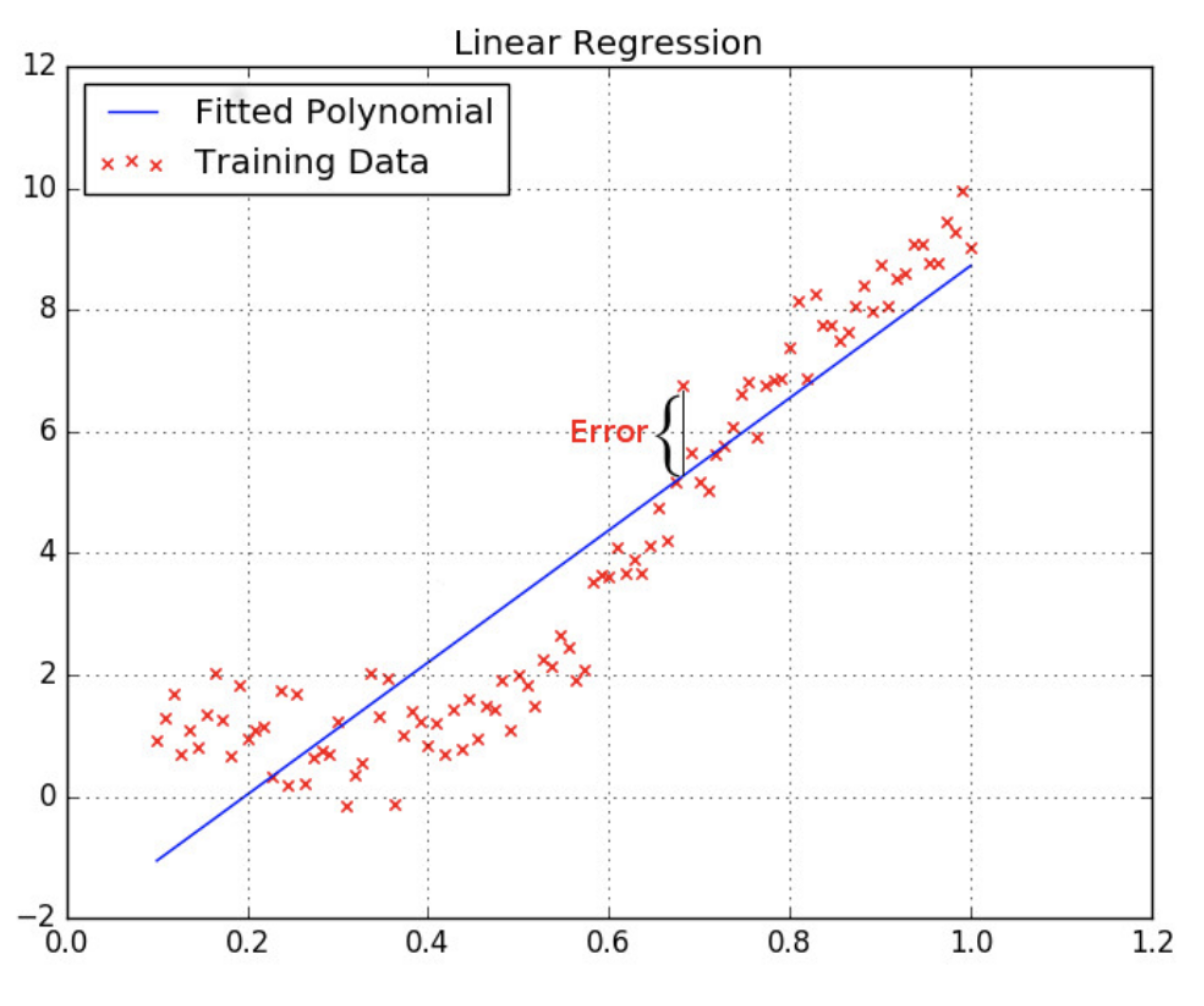

In [13]:
Image(filename='../images/error.png', width=600)

### Types of Cost funtion (Just for Introduction)

### Sum of Squares
$$\sum_{i=1}^ne_i^2 = \sum_{i=1}^n(y_t - \beta_0 - \beta_1X_1 - \beta_2X_2)^2$$

# (Vanilla) Gradient descent

- Gradient Descent is an **optimisation algorithm** that attempts to find the **local or global minima** of a function by using its **partial derivatives**. In ML it is used to __optimise the cost function__ (reduce our error). 

- This algorithm is commonly used to optimise convex functions. The idea is very simple — to reach the global optimum of a convex function from any point, we need to move in the direction **opposite** to that of greatest increase of the function. As the function is convex, this strategy will always take us to the global optimum. 

 - A gradient is an extension of partial derivatives. Gradients take the partial derivatives of each variable in a function and then places each partial derivative in a vector. The gradient value is zero at a local maximum or local minimum (because there is no single direction of increase) -  also referred to as **convergence**.

 - In mathematics, the **gradient is a multi-variable generalization of the derivative**. While a derivative can be defined on functions of a single variable, for functions of several variables, the gradient takes its place. The gradient is a vector-valued function, as opposed to a derivative, which is scalar-valued.

 - **Gradient** of a function gives the direction of the **steepest ascent**, i.e. the direction to move if you want to increase the function. 

Now, the _direction_ of **greatest increase of the function** is determined by taking the partial derivatives of the function with respect to every variable. For example, let us say we wish to optimise a convex function $f(x)$, where $x = (x_1, x_2, \ldots, x_d)^T$. Let us say, we start at a point $s \in \mathbb{R}^d$. Then, the direction of greatest increase of $f$ at $s$ is given by 

$$
\nabla f(s) = \left(\frac{\partial f(s)}{\partial x_1}, \frac{\partial f(s)}{\partial x_2}, \ldots ,\frac{\partial f(s)}{\partial x_d} \right)^T.
$$

 - Since we want to **decrease the function**, we take the **negative gradient**. The length of the gradient function is an indication of how step the slope is. 
 
With this derivative, we design an update rule, which asks us to move in the direction opposite to the direction of greatest increase. By repeatedly applying this rule, we hope to reach the global minimum. We hence move to $t$, which is given by

$$
t = s - \gamma \nabla f(s),
$$
where $\gamma$ is a parameter called the *learning rate*.

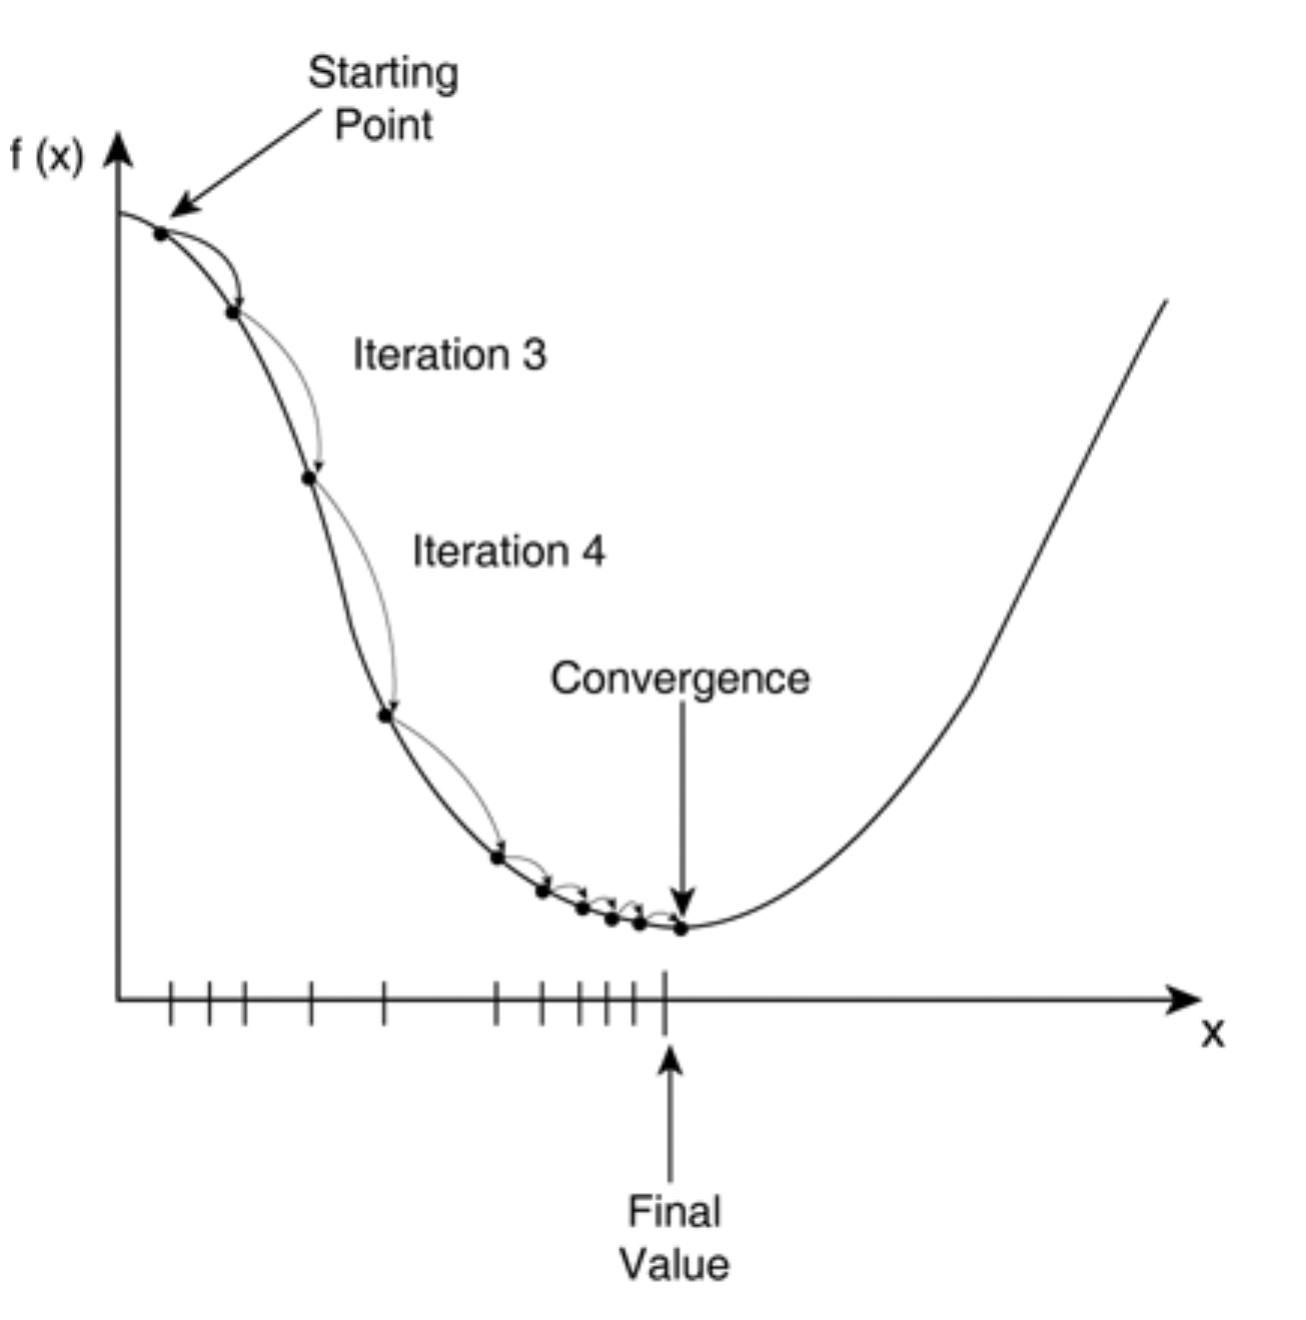

In [15]:
Image(filename='../images/gd1.png', width=600)

### Lets create a model with 50 observations and 2 features per observation

In [42]:
feature_1=np.random.randint(low=1,high=20,size=(50,))
feature_2=np.random.randint(low=1,high=20,size=(50,)) 

In [43]:
feature_1.shape, feature_2.shape

((50,), (50,))

In [44]:
y_true=3+2*feature_1-4*feature_2+np.random.random((50,))
print(y_true.shape)
y_true 

(50,)


array([-62.63718043,   9.74797194,  21.35159446,   1.74662281,
         1.42289906, -32.78741283, -46.65228467, -20.72359665,
       -38.79201369, -10.96205111,  -4.35317451, -28.44134347,
        -4.66264455,   7.65958102,  19.45859641,   3.24121803,
       -42.86763754,  -6.57912088,   9.89175774,  -0.81409716,
       -58.97029202,  35.54623205,  -2.95396658, -18.40867983,
        21.02333752, -14.76639791,  27.72276626,  -2.68007345,
        -2.67034326,  -4.66875364, -48.80382251, -26.16576047,
        21.90124959, -28.18230678, -52.0586702 , -20.32905867,
        17.89310342, -22.54612289, -28.38713934,  11.82125318,
       -56.28640863,  -0.09229443, -22.22104152,  19.97849587,
       -46.92211331,  25.46819441,  13.12312116, -22.81885738,
        -4.98330951, -14.39862632])

In [45]:
X=pd.DataFrame({'intercept':np.ones_like(feature_1),'feature_1':feature_1,'feature_2':feature_2})
X.head()

,intercept,feature_1,feature_2
0,1,5,19
1,1,7,2
2,1,17,4
3,1,5,3
4,1,13,7


In [46]:
W=np.zeros(X.shape[1])
W

array([0., 0., 0.])

In [47]:
def myprediction(features,weights):
    predictions=np.dot(features,weights)
    return(predictions)

y_pred = myprediction(X,W)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
def myerror(y_true,y_pred):
    error=y_true - y_pred
    return(error)

myerror(y_true,y_pred)

array([-62.63718043,   9.74797194,  21.35159446,   1.74662281,
         1.42289906, -32.78741283, -46.65228467, -20.72359665,
       -38.79201369, -10.96205111,  -4.35317451, -28.44134347,
        -4.66264455,   7.65958102,  19.45859641,   3.24121803,
       -42.86763754,  -6.57912088,   9.89175774,  -0.81409716,
       -58.97029202,  35.54623205,  -2.95396658, -18.40867983,
        21.02333752, -14.76639791,  27.72276626,  -2.68007345,
        -2.67034326,  -4.66875364, -48.80382251, -26.16576047,
        21.90124959, -28.18230678, -52.0586702 , -20.32905867,
        17.89310342, -22.54612289, -28.38713934,  11.82125318,
       -56.28640863,  -0.09229443, -22.22104152,  19.97849587,
       -46.92211331,  25.46819441,  13.12312116, -22.81885738,
        -4.98330951, -14.39862632])

In [49]:
def mycost(y_true,y_pred):
    error=myerror(y_true,y_pred)
    cost=np.dot(error.T,error)
    return(cost)

mycost(y_true,y_pred)

36689.74857001944

In [50]:
def gradient(y_true,features,weights):
    
    y_pred = myprediction(features,weights)
    error=myerror(y_true,y_pred)    
    gradient=-np.dot(features.T,error)  #gradient = -2X^T*(y-XW)
    
    return(gradient)

gradient(y_true,X,W)

array([  530.58860122,  1657.07339378, 10441.05952008])

In [52]:
def lr_fit(y_true,features,learning_rate):
    
    weights=np.zeros(features.shape[1])
    
    for i in np.arange(30000):
        
        weights = weights - learning_rate*gradient(y_true,features,weights)         
#        weights[0] = weights[0] - 10*learning_rate*gradient(y_true,features,weights)[0]
        
        if i%1000==0:
            y_pred = myprediction(features,weights)
            print(mycost(y_true,y_pred),weights)
            
    return(weights)

lr_fit(y_true,X,0.0001)

21162.404535085698 [-0.05305886 -0.16570734 -1.04410595]
27.997453292556223 [ 1.63067489  2.10034121 -3.92553125]
10.877326343441986 [ 2.53957056  2.05319789 -3.96621654]
5.90944007951385 [ 3.02917615  2.02780264 -3.98813297]
4.46786817968623 [ 3.29291779  2.01412268 -3.99993895]
4.0495555549664815 [ 3.43499062  2.00675353 -4.00629862]
3.9281703836678266 [ 3.51152267  2.0027839  -4.00972446]
3.892947062781781 [ 3.5527491   2.00064554 -4.01156989]
3.8827260257229055 [ 3.57495703  1.99949364 -4.01256399]
3.8797601043976973 [ 3.58692003  1.99887313 -4.0130995 ]
3.878899458921489 [ 3.59336429  1.99853888 -4.01338797]
3.8786497184346613 [ 3.59683569  1.99835882 -4.01354336]
3.878577249209498 [ 3.59870567  1.99826183 -4.01362707]
3.8785562202259487 [ 3.599713    1.99820958 -4.01367216]
3.878550118075009 [ 3.60025563  1.99818143 -4.01369645]
3.8785483473642963 [ 3.60054793  1.99816627 -4.01370953]
3.8785478335428025 [ 3.60070539  1.9981581  -4.01371658]
3.8785476844430615 [ 3.60079021  1.9981

array([ 3.60088922,  1.99814857, -4.01372481])

### Lets implement the same model using scikit learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
X.shape

In [ ]:
lr.fit(X.iloc[:,1:],y_true)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_